In [1]:
import matplotlib.pyplot as plt
from data.data_io import *
import numpy as np

In [2]:
df = read_csv('resources/train.csv')

Describe data frame

In [3]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [4]:
df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [5]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [6]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


Preliminary

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [9]:
df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [10]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"Category in {col} is : {df[col].unique()}")

Category in brand is : ['Ford' 'BMW' 'Jaguar' 'Pontiac' 'Acura' 'Audi' 'GMC' 'Maserati'
 'Chevrolet' 'Porsche' 'Mercedes-Benz' 'Tesla' 'Lexus' 'Kia' 'Lincoln'
 'Dodge' 'Volkswagen' 'Land' 'Cadillac' 'Mazda' 'RAM' 'Subaru' 'Hyundai'
 'MINI' 'Jeep' 'Honda' 'Hummer' 'Nissan' 'Toyota' 'Volvo' 'Genesis'
 'Mitsubishi' 'Buick' 'INFINITI' 'McLaren' 'Scion' 'Lamborghini' 'Bentley'
 'Suzuki' 'Ferrari' 'Alfa' 'Rolls-Royce' 'Chrysler' 'Aston' 'Rivian'
 'Lotus' 'Saturn' 'Lucid' 'Mercury' 'Maybach' 'FIAT' 'Plymouth' 'Bugatti']
Category in model is : ['F-150 Lariat' '335 i' 'XF Luxury' ... 'Q4 e-tron Sportback Premium'
 'Countryman Cooper' 'S-10 LS']
Category in fuel_type is : ['Gasoline' 'Hybrid' 'E85 Flex Fuel' 'Diesel' '–' 'Plug-In Hybrid'
 'not supported']
Category in engine is : ['375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel'
 '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel'
 '300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel' ... '3.0L'
 '3.0 Liter GTDI' '120.0HP 2.2L 4 Cylinder Engine Flex 

Remove NaN fields

In [11]:
df.replace('–', pd.NA, inplace=True)
df = df.dropna()

Extract engine spec

In [12]:
from data.data_processing import *

In [13]:
df[['horsepower', 'displacement', 'num_cylinders', 'v_configuration']] = df['engine'].apply(lambda x: pd.Series(extract_engine_specs(x)))
df = df.drop(columns=['engine'])
nan_rows = df[df[['horsepower', 'displacement', 'num_cylinders']].isna().any(axis=1)]
nan_rows

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,displacement,num_cylinders,v_configuration
20,20,GMC,Terrain SLE,2020,61830,Gasoline,9-Speed Automatic,Summit White,Jet Black,None reported,Yes,26485,NaN,1.5,4.0,False
26,26,Ford,Expedition Max XLT,2021,6449,Gasoline,10-Speed Automatic,Black,Mesa,None reported,Yes,89995,NaN,3.5,6.0,True
37,37,Mazda,CX-30 Premium Package,2020,25779,Gasoline,6-Speed Automatic,Platinum Quartz Metallic,Black,At least 1 accident or damage reported,Yes,24995,NaN,2.5,4.0,False
80,80,Jeep,Wrangler Unlimited Sport,2017,65212,Gasoline,5-Speed Automatic,Black,Black,None reported,Yes,37995,NaN,3.6,6.0,True
112,112,Ford,Expedition Max Limited,2021,22270,Gasoline,10-Speed Automatic,White,Medium Stone,None reported,Yes,59950,NaN,5.0,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54210,54210,Kia,Sportage Nightfall,2022,26468,Gasoline,Automatic,Red,Black,None reported,Yes,27875,NaN,2.4,4.0,False
54231,54231,Ford,Expedition Max XLT,2021,10232,Gasoline,10-Speed Automatic,Black,Sandstone,None reported,Yes,57850,NaN,3.5,6.0,True
54245,54245,Chrysler,Crossfire Limited,2005,2353,Gasoline,6-Speed Automatic,Metallic,Black,None reported,Yes,38322,NaN,3.2,6.0,True
54258,54258,RAM,1500 Longhorn,2019,76249,Gasoline,6-Speed Automatic,Diamond Black,Mountain Brown,At least 1 accident or damage reported,Yes,40995,NaN,5.7,8.0,True


Consolidate color

In [14]:
df['ext_metallic'] = df['ext_col'].apply(lambda x: 'metallic' if 'metallic' in x.lower() else 'non-metallic')
df['ext_col'].unique()

array(['Blue', 'Black', 'Purple', 'Gray', 'White', 'Red', 'Silver',
       'Summit White', 'Platinum Quartz Metallic', 'Green', 'Orange',
       'Lunar Rock', 'Red Quartz Tintcoat', 'Beige', 'Gold',
       'Jet Black Mica', 'Delmonico Red Pearlcoat', 'Brown',
       'Rich Garnet Metallic', 'Stellar Black Metallic', 'Yellow',
       'Deep Black Pearl Effect', 'Metallic', 'Ice Silver Metallic',
       'Agate Black Metallic', 'Rosso Mars Metallic', 'White Clearcoat',
       'Santorini Black Metallic', 'DB Black Clearcoat',
       'Snowflake White Pearl', 'Glacial White Pearl',
       'Maximum Steel Metallic', 'Blue Caelum', 'Dark Matter Metallic',
       'Oxford White', 'Cobra Beige Metallic', 'Velvet Red Pearlcoat',
       'Python Green', 'Obsidian Black Metallic', 'Beluga Black',
       'Blue Reflex Mica', 'Sparkling Silver', 'Black Clearcoat',
       'Soul Red Crystal Metallic', 'Bright White Clearcoat',
       'Shimmering Silver', 'Midnight Black Metallic',
       'Cajun Red Tintcoat'

In [15]:
df['ext_col'] = df['ext_col'].apply(consolidate_color)
df['int_col'] = df['int_col'].apply(consolidate_color) 
df

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,displacement,num_cylinders,v_configuration,ext_metallic
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,10-Speed A/T,blue,gray,None reported,Yes,11000,375.0,3.5,6.0,True,non-metallic
1,1,BMW,335 i,2007,80000,Gasoline,6-Speed M/T,black,black,None reported,Yes,8250,300.0,3.0,6.0,False,non-metallic
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,6-Speed A/T,purple,beige,None reported,Yes,15000,300.0,4.2,8.0,False,non-metallic
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,Transmission w/Dual Shift Mode,gray,brown,None reported,Yes,63500,335.0,3.0,6.0,False,non-metallic
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,A/T,white,black,None reported,Yes,7850,200.0,3.8,6.0,True,non-metallic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,8-Speed A/T,white,brown,None reported,Yes,29000,445.0,4.4,8.0,False,non-metallic
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,6-Speed A/T,black,black,At least 1 accident or damage reported,Yes,6500,220.0,2.0,4.0,False,non-metallic
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,Transmission w/Dual Shift Mode,white,black,At least 1 accident or damage reported,Yes,18950,420.0,3.6,6.0,True,non-metallic
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,8-Speed Automatic with Auto-Shift,beige,brown,None reported,Yes,194965,NaN,4.0,NaN,False,non-metallic


In [16]:
df['ext_col'].value_counts()

ext_col
black            15398
white            13432
gray              7874
silver            5231
blue              4735
                 ...  
custom color         1
lunar rock           1
mountain air         1
rosso                1
bianco icarus        1
Name: count, Length: 64, dtype: int64

In [17]:
df['ext_metallic'].value_counts()

ext_metallic
non-metallic    51993
metallic          900
Name: count, dtype: int64

Correlation between price and other numerical cells

In [21]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Extract the correlation values of 'price' with other variables
price_correlation = correlation_matrix['price']
price_correlation

id              -0.000403
model_year       0.216960
milage          -0.246133
price            1.000000
horsepower       0.259170
displacement     0.099980
num_cylinders    0.123617
Name: price, dtype: float64

In [26]:
df_color = df['ext_col']
df_color_encoded = pd.get_dummies(df_color, columns=['ext_col'])
df_result = pd.concat([df_color_encoded, df['price']], axis=1)
correlation_matrix = df_result.corr()
correlation_matrix['price'].sort_values(ascending=False)

price          1.000000
rosso corsa    0.073085
c / c          0.044472
gray           0.035890
bianco isis    0.027087
                 ...   
white         -0.008464
brown         -0.013312
beige         -0.021154
gold          -0.024909
silver        -0.034527
Name: price, Length: 65, dtype: float64

In [27]:
grouped = df.groupby('brand')['price'].agg(['mean', 'median', 'count', 'min', 'max'])
print(grouped.sort_values(by='mean', ascending=False))

                       mean     median  count      min      max
brand                                                          
Bugatti        1.950995e+06  1950995.0      1  1950995  1950995
Ferrari        1.579934e+05   104000.0     78    10500   599000
Lamborghini    1.385819e+05    84844.0    114     3000  1950995
Aston          1.178858e+05    71497.5     50     5500   489995
Rolls-Royce    1.101787e+05    69500.0    119    17816   749950
McLaren        1.098623e+05    71000.0     42    25950   349950
Bentley        1.056105e+05    72997.0    276     2899   749950
Lucid          8.418500e+04    84185.0      2    68420    99950
Rivian         7.949581e+04    93500.0     27    17900   159000
Porsche        6.391850e+04    42250.0   2571     2000  2954083
Maserati       5.695651e+04    36999.5    292     4700   489995
Maybach        5.250000e+04    52500.0      1    52500    52500
Genesis        5.179603e+04    40249.5    242     5230   749950
Tesla          4.924984e+04    43900.0  

In [28]:
import scipy.stats as stats

# Perform ANOVA
anova_result = stats.f_oneway(*[group['price'].values for name, group in df.groupby('brand')])
print(f'ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

ANOVA result: F-statistic = 51.16009731980623, p-value = 0.0


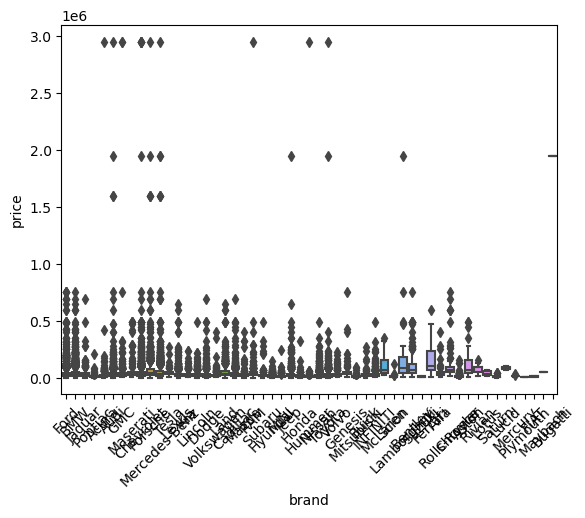

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the distribution of prices by brand
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=45)  # Rotate labels if there are many brands
plt.show()

In [30]:
# Encoding brands based on the mean price
mean_prices = df.groupby('brand')['price'].mean()
df['brand_encoded'] = df['brand'].map(mean_prices)

# Compute correlation between encoded brand and price
correlation = df['brand_encoded'].corr(df['price'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.21893721504614044


In [36]:
df_result = pd.concat([df['accident'], df['price']], axis=1)
df_result = pd.get_dummies(df_result, columns=['accident'], drop_first=True)
correlation_matrix = df_result.corr()
correlation_matrix['price']

,price,accident_None reported
price,1.000000,0.113098
accident_None reported,0.113098,1.000000
